Text(0.5, 1.0, 'Original Data')

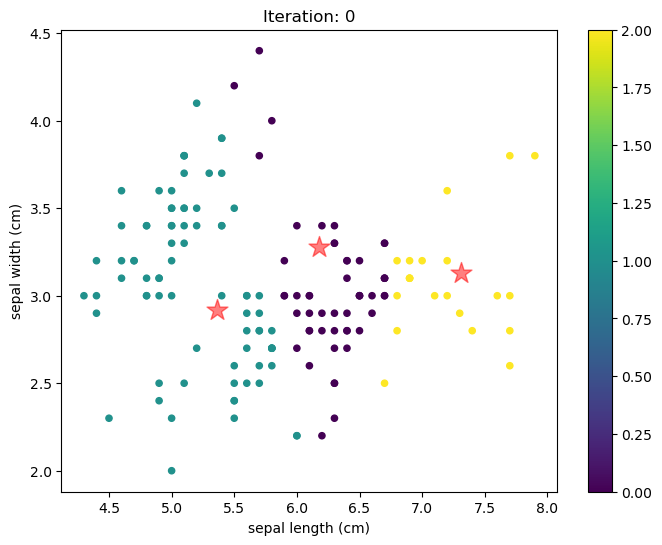

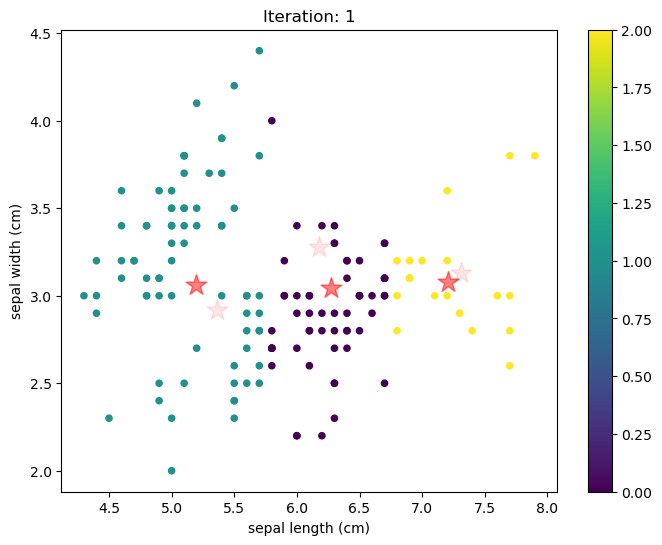

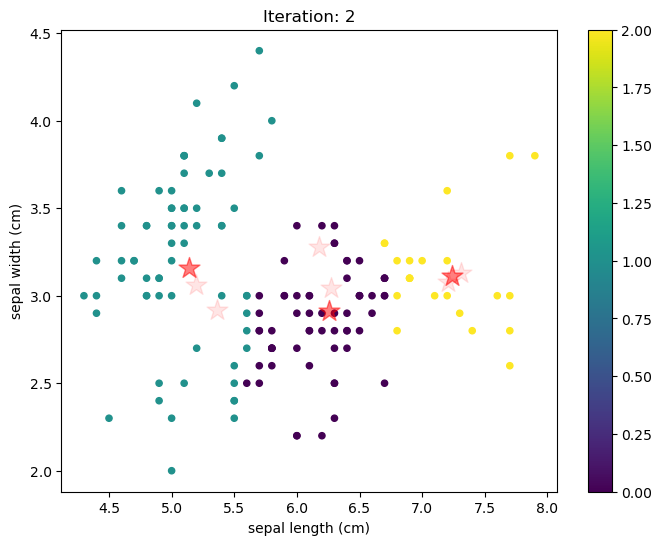

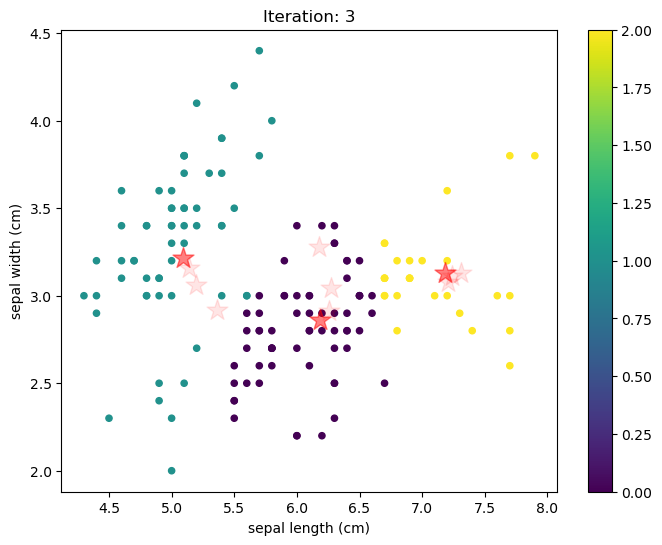

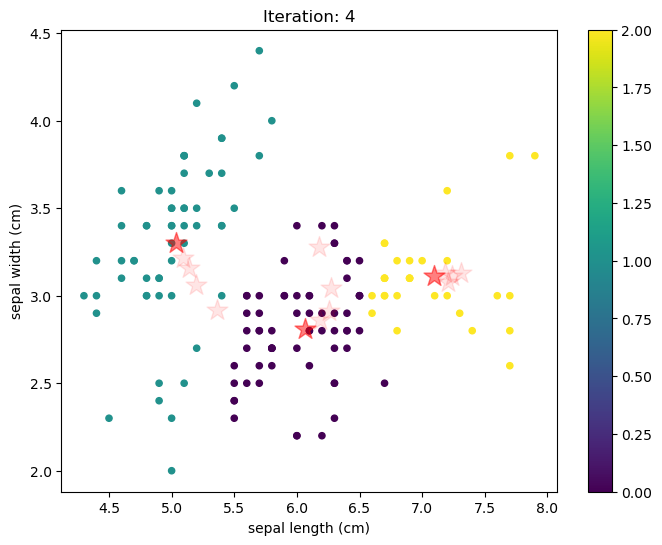

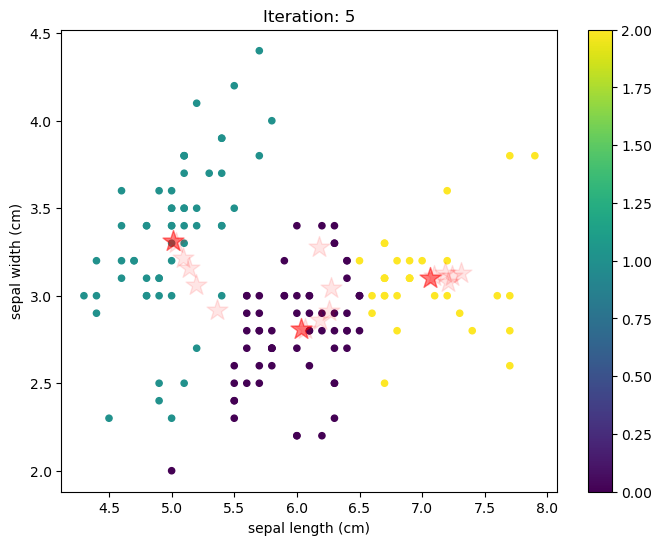

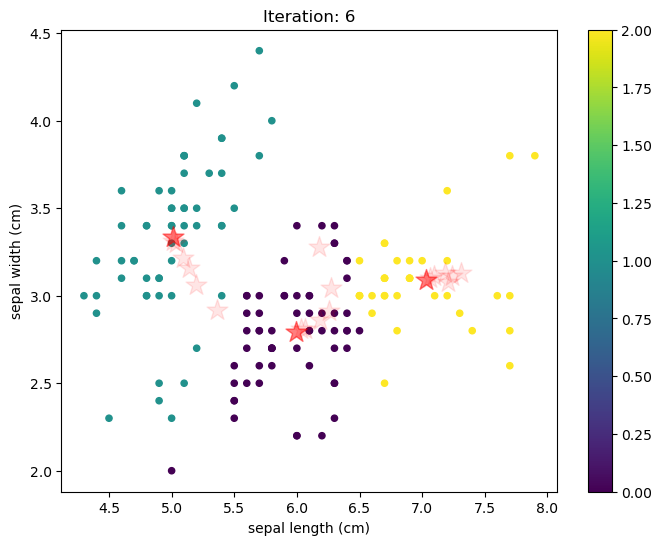

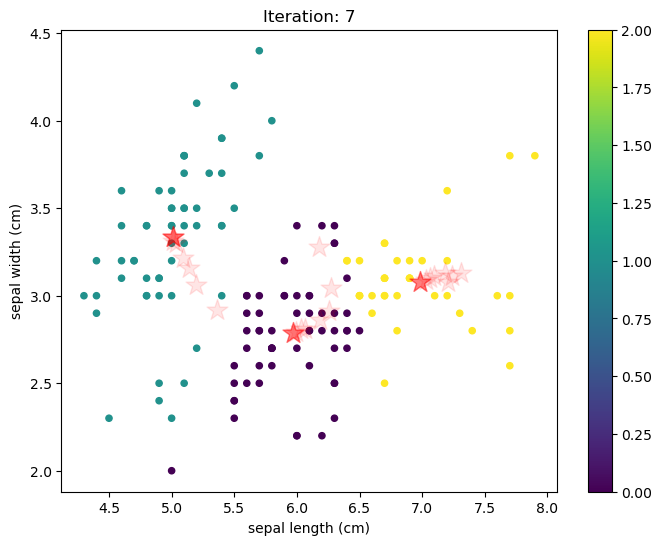

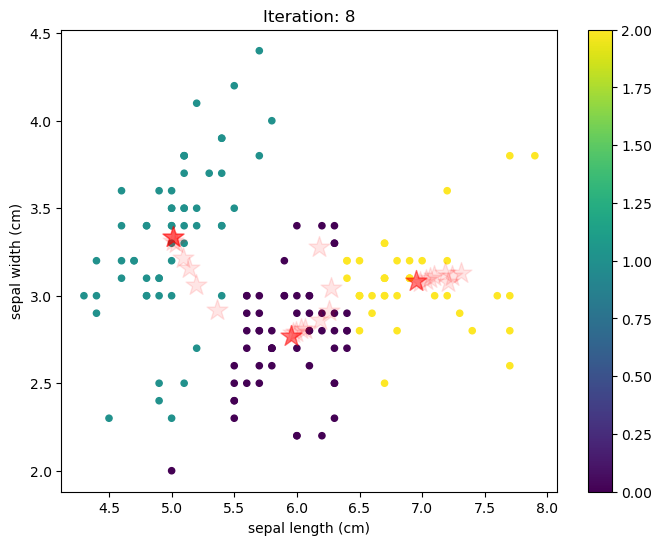

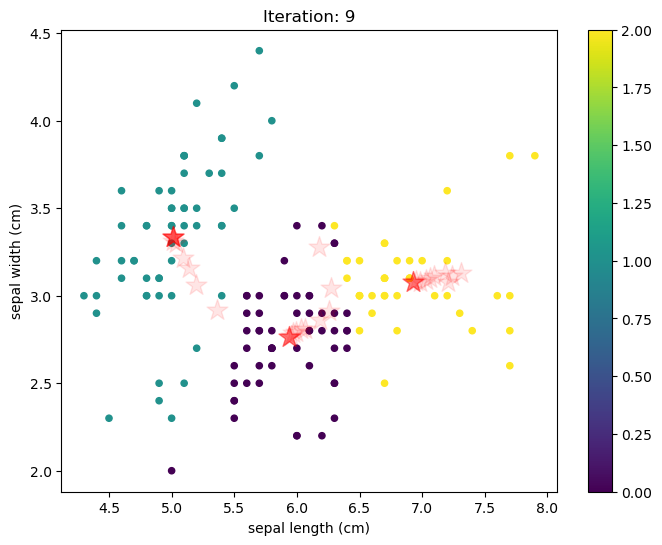

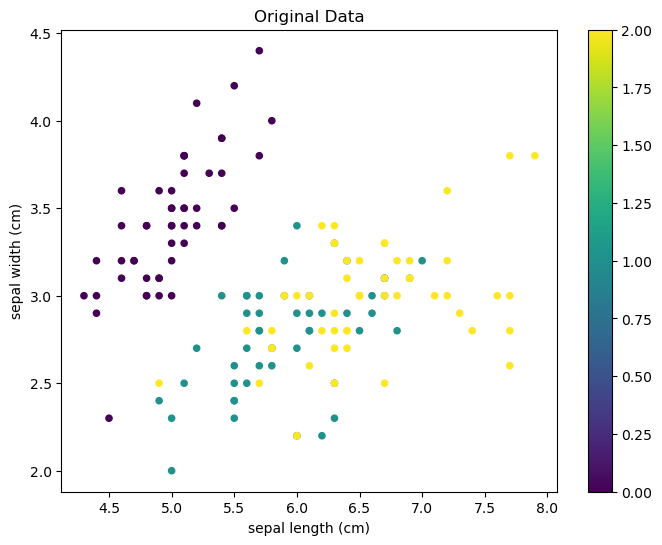

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

from sklearn.cluster import KMeans
import sklearn.datasets
import matplotlib.pyplot as plt

dataset = sklearn.datasets.load_iris(as_frame=True)
X = (dataset['data'].loc[:, ['sepal length (cm)', 'sepal width (cm)']])
y = dataset['target']
centroids = []

for i in range(10):
    model = KMeans(n_clusters=3, init='random', n_init=1, max_iter=i+1, random_state=42)
    model.fit(X)
    label = model.predict(X)
    # plot the input data colored by cluster
    fig, ax = plt.subplots(figsize=(8,6))
    X.plot.scatter(x='sepal length (cm)', y='sepal width (cm)', c=label, cmap='viridis', ax=ax)
    # plot the centers of the clusters
    centers = model.cluster_centers_
    ax.scatter(centers[:,0], centers[:,1], marker='*', s=250, color='r', alpha=.5)
    ax.set_title('Iteration: ' + str(i))
    # plot previous centroids with reduced alpha value
    if i > 0:
        for centroid in centroids:
            ax.scatter(centroid[:,0], centroid[:,1], marker='*', s=250, color='r', alpha=.1)
    # save the current centroids
    centroids.append(model.cluster_centers_)

# plot the original data colored by target
model = KMeans(n_clusters=3, init='random', n_init=1, max_iter=1, random_state=42)
model.fit(X)
label = model.predict(X)
fig, ax = plt.subplots(figsize=(8,6))
X.plot.scatter(x='sepal length (cm)', y='sepal width (cm)', c=y, cmap='viridis', ax=ax)
ax.set_title('Original Data')

Text(0.5, 1.0, 'Elbow Method')

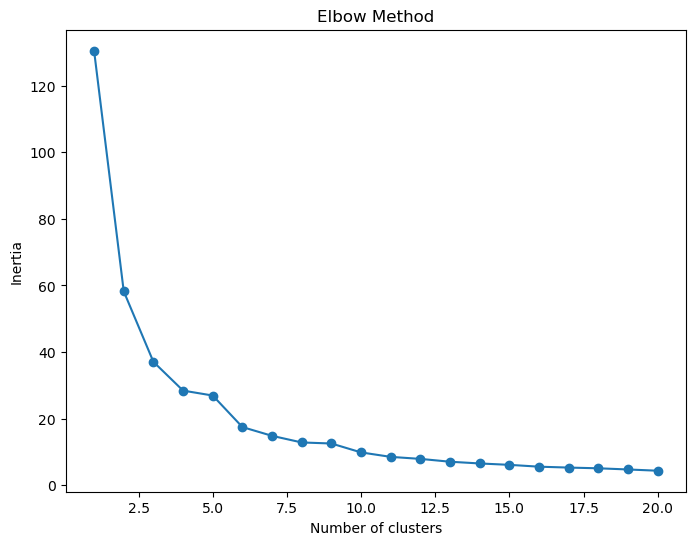

In [2]:
# find the possible K values for a given dataset

# elbow method - track the inertia of the models when the K value increases
# inertia is the sum of the squared distances of samples to their closest cluster center

# silhouetee coefficient measures how similar an object is similar to its own cluster than to others
# the value of silhouetee coefficient ranges from -1 to 1

inertias = []
max_clusters = 20
for i in range(max_clusters):
    km = KMeans(n_clusters=i+1, n_init='auto', max_iter=300, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1, max_clusters+1), inertias, marker='o')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
ax.set_title('Elbow Method')

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
# get the help documentation for SilhouetteVisualizer from within Jupyter Notebook
SilhouetteVisualizer?

Init signature:
SilhouetteVisualizer(
    estimator,
    ax=None,
    colors=None,
    is_fitted='auto',
    **kwargs,
)
Docstring:     
The Silhouette Visualizer displays the silhouette coefficient for each
sample on a per-cluster basis, visually evaluating the density and
separation between clusters. The score is calculated by averaging the
silhouette coefficient for each sample, computed as the difference
between the average intra-cluster distance and the mean nearest-cluster
distance for each sample, normalized by the maximum value. This produces a
score between -1 and +1, where scores near +1 indicate high separation
and scores near -1 indicate that the samples may have been assigned to
the wrong cluster.

In SilhouetteVisualizer plots, clusters with higher scores have wider
silhouettes, but clusters that are less cohesive will fall short of the
average score across all clusters, which is plotted as a vertical dotted
red line.

This is particularly useful for determining cluster i

In [4]:
# list matplotlib fonts available
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

['C:\\Windows\\Fonts\\cour.ttf',
 'C:\\Windows\\Fonts\\NirmalaB.ttf',
 'C:\\Windows\\Fonts\\mvboli.ttf',
 'C:\\Windows\\Fonts\\LHANDW.TTF',
 'C:\\Windows\\Fonts\\calibrii.ttf',
 'C:\\Windows\\Fonts\\PERBI___.TTF',
 'C:\\Windows\\Fonts\\TCB_____.TTF',
 'C:\\Windows\\Fonts\\GILB____.TTF',
 'C:\\Windows\\Fonts\\trebucbi.ttf',
 'C:\\Windows\\Fonts\\timesbi.ttf',
 'C:\\Windows\\Fonts\\DUBAI-REGULAR.TTF',
 'C:\\Windows\\Fonts\\GARA.TTF',
 'C:\\Windows\\Fonts\\CALIFI.TTF',
 'C:\\Windows\\Fonts\\ANTQUABI.TTF',
 'C:\\Windows\\Fonts\\palabi.ttf',
 'C:\\Windows\\Fonts\\HTOWERT.TTF',
 'C:\\Windows\\Fonts\\tahoma.ttf',
 'C:\\Windows\\Fonts\\BOOKOSBI.TTF',
 'C:\\Windows\\Fonts\\FRAMDCN.TTF',
 'C:\\Windows\\Fonts\\verdanab.ttf',
 'C:\\Windows\\Fonts\\simfang.ttf',
 'C:\\Windows\\Fonts\\ARIALNB.TTF',
 'C:\\Windows\\Fonts\\ELEPHNT.TTF',
 'C:\\Windows\\Fonts\\FiraGO-Light.otf',
 'C:\\Windows\\Fonts\\GILBI___.TTF',
 'C:\\Windows\\Fonts\\ERASDEMI.TTF',
 'C:\\Windows\\Fonts\\ANTQUAI.TTF',
 'C:\\Windows\\Fo

In [ ]:
# if on Linux, set matplotlib font to DejaVuSans
import matplotlib
matplotlib.rcParams['font.family'] = 'DejaVu Sans'

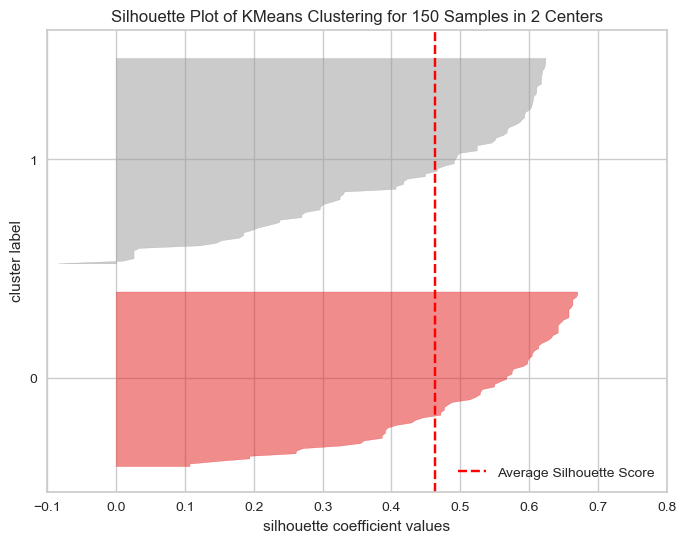

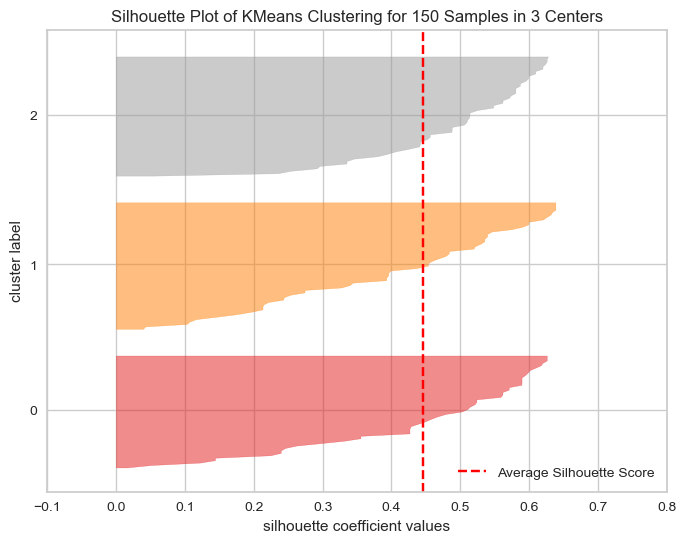

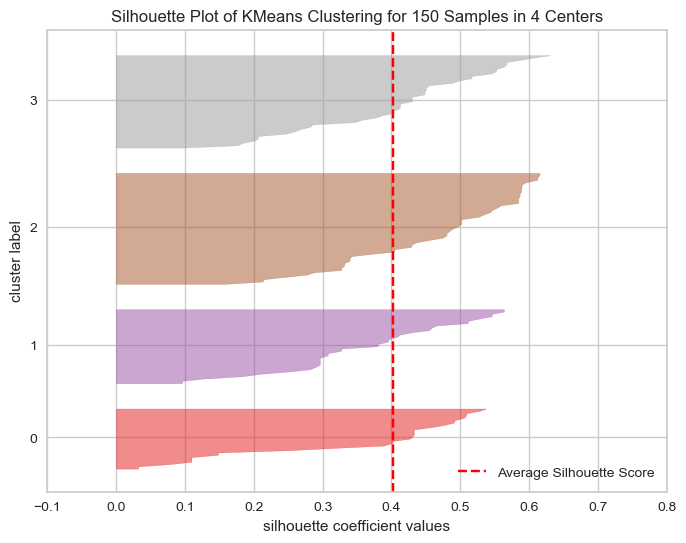

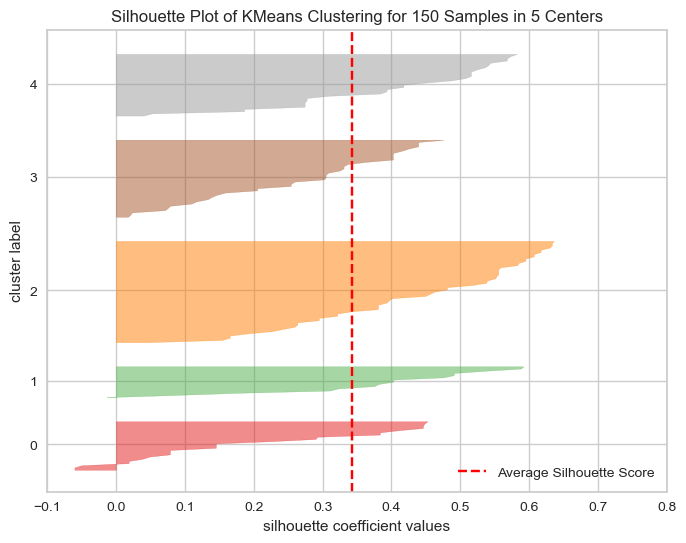

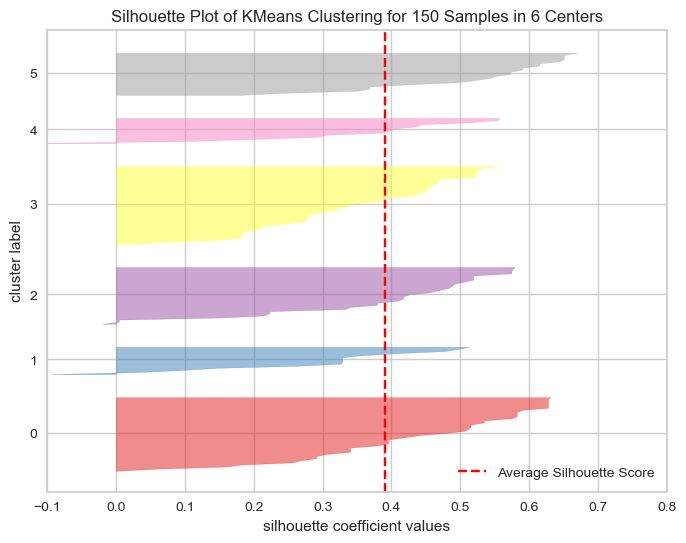

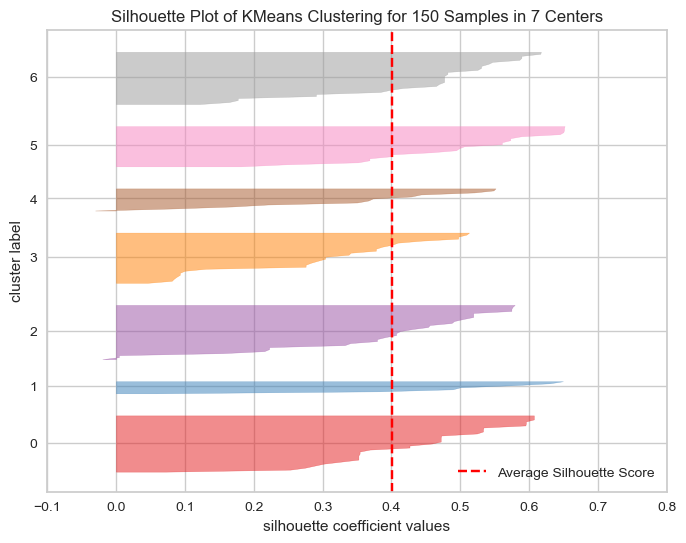

In [6]:
# run silhouette method to find optimal number of clusters
from yellowbrick.cluster import silhouette_visualizer
# silhouette_visualizer?

max_clusters = 6
for i in range(max_clusters):
    km = KMeans(n_clusters=i+2, n_init='auto', max_iter=300, random_state=42)
    fig, ax = plt.subplots(figsize=(8,6))
    # set show=False so we can set xlim to the same value for all plots
    viz = silhouette_visualizer(km, X, color='yellowbrick', ax=ax, show=False)
    ax.set_xlim([-0.1, 0.8])